# Анализ тарифов сотовой компании

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Для планирования рекламной компанииНа основе анализа поведения клиентов требуется определить какой тариф лучше и приносит больше денег.

## Шаг 1. Получение и подготовка данных

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
# Загрузим исходные данные для анализа
df_calls = pd.read_csv('calls.csv')
df_internet = pd.read_csv('internet.csv')
df_messages = pd.read_csv('messages.csv')
df_tariffs = pd.read_csv('tariffs.csv')
df_users = pd.read_csv('users.csv')

In [3]:
# выведем на экран первые 10 строк таблицы с данными звонков
df_calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [4]:
# получим общую информацию о данных в таблице звонков
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Пропущенных данных в таблице звонков не обнаружено, приведем к формату даты данные колонки `call_date`, округлим звонки до минут

In [5]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_calls['duration'] = np.ceil(df_calls['duration'])
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


In [6]:
# проверка изменения формата данных в таблице звонков
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [7]:
# выведем на экран первые 10 строк таблицы потребления интернет-трафика
df_internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [8]:
# проверка формата данных в таблице данных интернет-трафика
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Пропусков данных не обнаружено. Удалим дубликат индекса в колонке `Unnamed: 0`, приведем к формату даты данные колонки `session_date`

In [9]:
df_internet = df_internet.drop(columns='Unnamed: 0')

In [10]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

In [11]:
# проверим изменение формата данных таблицы интернет-трафика
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


In [12]:
# выведем на экран первые 10 строк таблицы с данными сообщений
df_messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [13]:
# получим общую информацию о данных в таблице с данными сообщений
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Пропусков данных не обнаружено. Приведем к формату даты данные колонки message_date

In [14]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

In [15]:
# проверим изменение формата данных таблицы сообщений
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [16]:
# выведем на экран первые 10 строк таблицы с данными пользователей
df_users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [17]:
# получим общую информацию о данных в таблице с данными пользователей
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Пропущенные значения обнаружены только в колонке даты отключения. Приведем формат колонок с датами подключения и отключения к формату даты.

Изменим название столбца `tariff` на `tariff_name`.

In [18]:
# изменение формата даты подключения
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

In [19]:
# изменение формата даты отключения
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

In [20]:
# изменение названия tariff на tariff_name
df_users = df_users.rename(columns={'tariff':'tariff_name'})

In [21]:
# проверка изменения формата даннных
display(df_users.head(10))
df_users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaT,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaT,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaT,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaT,Пермь,Василиса,Блинова,2018-03-22,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id        500 non-null int64
age            500 non-null int64
churn_date     38 non-null datetime64[ns]
city           500 non-null object
first_name     500 non-null object
last_name      500 non-null object
reg_date       500 non-null datetime64[ns]
tariff_name    500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Проверка наличия дубликатов в данных:

In [22]:
display(df_calls.duplicated().sum())
display(df_internet.duplicated().sum())
display(df_messages.duplicated().sum())
df_users.duplicated().sum()

0

0

0

0

Проверка наличия неявных дубликатов в данных:

In [23]:
df_users['city'].sort_values().unique()

array(['Архангельск', 'Астрахань', 'Балашиха', 'Барнаул', 'Белгород',
       'Брянск', 'Владивосток', 'Владикавказ', 'Владимир', 'Волгоград',
       'Волжский', 'Вологда', 'Воронеж', 'Грозный', 'Екатеринбург',
       'Иваново', 'Ижевск', 'Иркутск', 'Казань', 'Калининград', 'Калуга',
       'Кемерово', 'Киров', 'Кострома', 'Краснодар', 'Красноярск',
       'Курган', 'Курск', 'Липецк', 'Магнитогорск', 'Махачкала', 'Москва',
       'Мурманск', 'Набережные Челны', 'Нижневартовск', 'Нижний Новгород',
       'Нижний Тагил', 'Новокузнецк', 'Новороссийск', 'Новосибирск',
       'Омск', 'Оренбург', 'Орёл', 'Пенза', 'Пермь', 'Петрозаводск',
       'Подольск', 'Ростов-на-Дону', 'Рязань', 'Самара',
       'Санкт-Петербург', 'Саранск', 'Саратов', 'Севастополь', 'Смоленск',
       'Сочи', 'Ставрополь', 'Стерлитамак', 'Сургут', 'Тамбов', 'Тверь',
       'Тольятти', 'Томск', 'Тула', 'Тюмень', 'Улан-Удэ', 'Ульяновск',
       'Уфа', 'Хабаровск', 'Химки', 'Чебоксары', 'Челябинск', 'Череповец',
       'Чи

In [24]:
# Выведем таблицу тарифов
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [25]:
# получим общую информацию о данных в таблице тарифов
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Проиндексируем таблицу по колонке с названием тарифа 

In [26]:
df_tariffs.set_index('tariff_name')

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
tariff_name,,,,,,,
smart,50,15360,500,550,200,3,3
ultra,1000,30720,3000,1950,150,1,1


## Шаг 2. Изучение данных


Посчитаем для каждого пользователя:

- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [27]:
# расчет количества звонков сделанных каждым пользователем
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month
df_calls_count = df_calls.groupby(by=['user_id', 'month']).agg({'id':'count'}).reset_index().rename(columns={'id':'calls_count'})
display(df_calls_count.head())

,user_id,month,calls_count
0,1000,5,22
1,1000,6,43
2,1000,7,47
3,1000,8,52
4,1000,9,58


In [28]:
# расчет продолжительности всех звонков сделанных каждым пользователем
df_calls_duration_sum = df_calls.groupby(by=['user_id', 'month']).agg({'duration':'sum'}).reset_index()
df_calls_duration_sum.head()

,user_id,month,duration
0,1000,5,159.0
1,1000,6,172.0
2,1000,7,340.0
3,1000,8,408.0
4,1000,9,466.0


In [29]:
# рассчет количества сообщений направленных каждым пользователем
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month
df_messages_count = df_messages.groupby(by=['user_id', 'month']).agg({'id':'count'}).reset_index().rename(columns={'id':'messages_count'})
df_messages_count.head()

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [30]:
# добавление информации о месяце потребления интернет-трафика
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month
df_internet_sum = df_internet.groupby(by=['user_id', 'month']).agg({'mb_used':'sum'}).reset_index().rename(columns={'mb_used':'mb_used_sum'})
df_internet_sum.head()

,user_id,month,mb_used_sum
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


In [31]:
# присоединение таблицы с длительностью звонков
data = df_calls_count.merge(df_calls_duration_sum, on=['user_id', 'month'], how='outer')
data.head()

,user_id,month,calls_count,duration
0,1000,5,22,159.0
1,1000,6,43,172.0
2,1000,7,47,340.0
3,1000,8,52,408.0
4,1000,9,58,466.0


In [32]:
# присоединение таблицы с количеством сообщений
data = data.merge(df_messages_count, on=['user_id', 'month'], how='outer', suffixes=('None', 'None'))
data.head()

,user_id,month,calls_count,duration,messages_count
0,1000,5,22.0,159.0,22.0
1,1000,6,43.0,172.0,60.0
2,1000,7,47.0,340.0,75.0
3,1000,8,52.0,408.0,81.0
4,1000,9,58.0,466.0,57.0


In [33]:
# присоединение таблицы с объемом интернет-трафика
data = data.merge(df_internet_sum, on=['user_id', 'month'], how='outer', suffixes=('None', 'None'))
data.head()

,user_id,month,calls_count,duration,messages_count,mb_used_sum
0,1000,5,22.0,159.0,22.0,2253.49
1,1000,6,43.0,172.0,60.0,23233.77
2,1000,7,47.0,340.0,75.0,14003.64
3,1000,8,52.0,408.0,81.0,14055.93
4,1000,9,58.0,466.0,57.0,14568.91


In [34]:
# присоединение таблицы пользователей
data = data.merge(df_users, on='user_id', how='outer', suffixes=('None', 'None'))
data.head()

,user_id,month,calls_count,duration,messages_count,mb_used_sum,age,churn_date,city,first_name,last_name,reg_date,tariff_name
0,1000,5.0,22.0,159.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.0,43.0,172.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.0,47.0,340.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.0,52.0,408.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.0,58.0,466.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [35]:
# присоединение таблицы тарифов
data = data.merge(df_tariffs, on='tariff_name', how='outer', suffixes=('None', 'None'))
data.head()

,user_id,month,calls_count,duration,messages_count,mb_used_sum,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,22.0,159.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,43.0,172.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,47.0,340.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,52.0,408.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,58.0,466.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


Рассчитаем помесячную выручку с каждого абонента:

In [36]:
# округление интернет-трафика до ГБ
data['mb_used_sum_GB'] = (np.ceil(data['mb_used_sum'] / 1024))

def def_rev(row_values):
    # расчет стоимости интернет-трафика
    if row_values['mb_used_sum_GB'] > row_values['mb_per_month_included'] / 1024:
        rev_int = (row_values['mb_used_sum_GB'] - row_values['mb_per_month_included'] / 1024) * row_values['rub_per_gb'] 
    else:
        rev_int = 0
    # расчет стоимости звонков
    if row_values['duration'] > row_values['minutes_included']:
        rev_calls = (row_values['duration'] - row_values['minutes_included']) * row_values['rub_per_minute']
    else:
        rev_calls = 0
    # расчет стоимости сообщений
    if row_values['messages_count'] > row_values['messages_included']:
        rev_mess = (row_values['messages_count'] - row_values['messages_included']) * row_values['rub_per_message']
    else:
        rev_mess = 0
    return  row_values['rub_monthly_fee'] + rev_int + rev_mess + rev_calls
    
data['revenue'] = data.apply(def_rev, axis=1)
data.head()

,user_id,month,calls_count,duration,messages_count,mb_used_sum,age,churn_date,city,first_name,...,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,mb_used_sum_GB,revenue
0,1000,5.0,22.0,159.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,3.0,1950.0
1,1000,6.0,43.0,172.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,23.0,1950.0
2,1000,7.0,47.0,340.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,14.0,1950.0
3,1000,8.0,52.0,408.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,14.0,1950.0
4,1000,9.0,58.0,466.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,15.0,1950.0


## Шаг 3. Анализ данных

In [37]:
# рассчет средней продолжительности и стандартного отклонения продолжительности звонка, количества сообщений и объема трафика для тарифа Smart
data.groupby(by='tariff_name').agg({'duration':['mean', 'std'], 'messages_count':['mean', 'std'], 'mb_used_sum_GB':['mean', 'std']})

duration             messages_count            mb_used_sum_GB  \
                   mean         std           mean        std           mean   
tariff_name                                                                    
smart        419.062978  189.325618      38.716441  26.787949      16.336176   
ultra        545.451104  306.925754      61.161006  45.931026      19.694359   

                       
                  std  
tariff_name            
smart        5.737923  
ultra        9.702924

Видим, что статистики тарифов отличаются - для тарифа Smart меньше средняя продолжительность звонка, меньше среднее количество звонков и меньше средний объем потребляемого интернет-трафика. При этом, стандартные отклонения указанных величин также меньше.

Посмотрим гистрограммы распределения исследуемых статистик:

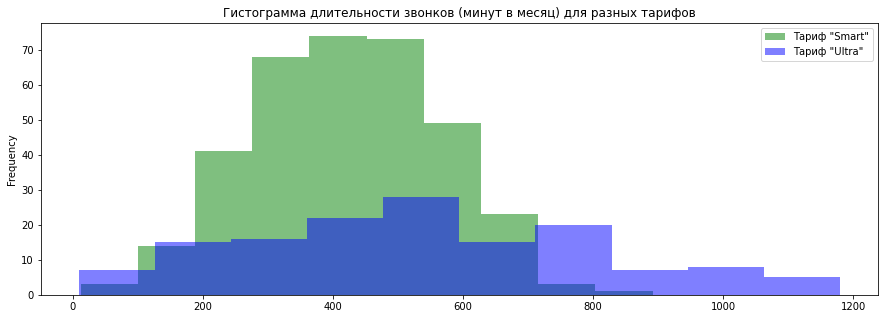

In [38]:
# оценка использования минут абонентами разных тарифов
smart_duration = data.query('tariff_name == "smart"').pivot_table(index='user_id', aggfunc='mean')['duration']
ultra_duration = data.query('tariff_name == "ultra"').pivot_table(index='user_id', aggfunc='mean')['duration']
plt.figure()
ax = smart_duration.plot(kind='hist', alpha=0.5, color="g", label='Тариф "Smart"')
ultra_duration.plot(kind='hist', alpha=0.5, color="b", ax=ax, title='Гистограмма длительности звонков (минут в месяц) для разных тарифов', figsize=(15, 5), label='Тариф "Ultra"')
plt.legend(loc='upper right')
plt.show;

На гистограмме видим, что средняя длительность звонков клиентов Smart локализована в диаппазоне 200 - 700 минут, при этом распределение длительности звонков Ultra скошено вправо и граница превышает 1000 минут. Таким образом, можем сделать вывод что клиентов Ultra характеризует разнообразная продолжительность разговоров - все клиенты используют мене половины ежемесячного лимити звонков в 3000 миинут. В то же время для клиентов Smart характерны четкие временные границы продолжительности разговоров - лишь небольшое число клиентов превышают ежемесячный лимит в 500 минут.

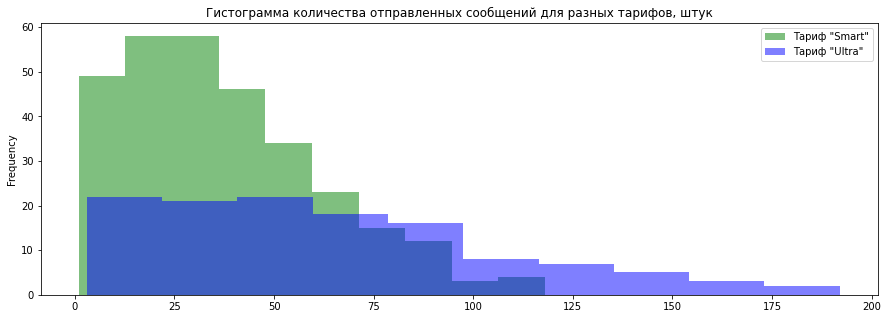

In [39]:
# оценка количества отправленных сообщений абонентами разных тарифов
smart_messages = data.query('tariff_name == "smart"').pivot_table(index='user_id', aggfunc='mean')['messages_count']
ultra_messages = data.query('tariff_name == "ultra"').pivot_table(index='user_id', aggfunc='mean')['messages_count']
plt.figure()
ax = smart_messages.plot.hist(alpha=0.5, color="g", label='Тариф "Smart"')
ultra_messages.plot(kind='hist', alpha=0.5, color="b", ax=ax, title='Гистограмма количества отправленных сообщений для разных тарифов, штук', figsize=(15, 5), label='Тариф "Ultra"')
plt.legend(loc='upper right')
plt.show;

На гистограмме количества отправленных сообщений видим, что среднее количество сообщений от клиентов Smart локализована в диаппазоне до 120 штук, при этом большинство клиентов укладываютя в ежемесячный лимит 50 сообщений. Таким образом, можем сделать вывод что клиентов Smart характеризует ограниченное использование сообщений, при этом части клиентов недостаточно тарифного лимита. Для клиентов Ultra по прежнему характерна большее разнооборазие среднемесячного числа сообщений - никто из них не превышает ежемесячный лимит в 1000 сообщений.

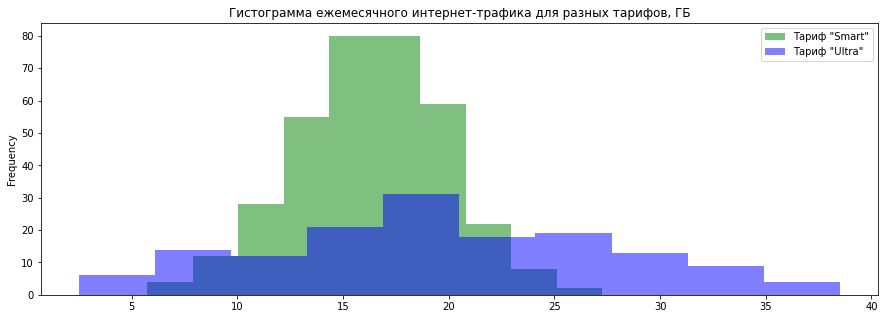

In [40]:
# оценка использования интернет-трафика абонентами разных тарифов
smart_mb = data.query('tariff_name == "smart"').pivot_table(index='user_id', aggfunc='mean')['mb_used_sum_GB']
ultra_mb = data.query('tariff_name == "ultra"').pivot_table(index='user_id', aggfunc='mean')['mb_used_sum_GB']
plt.figure()
ax = smart_mb.plot(kind='hist', alpha=0.5, color="g", label='Тариф "Smart"')
ultra_mb.plot(kind='hist', alpha=0.5, color="b", ax=ax, title='Гистограмма ежемесячного интернет-трафика для разных тарифов, ГБ', figsize=(15, 5), label='Тариф "Ultra"')
plt.legend(loc='upper right')
plt.show;

Аналогично предыдущим графика, на гистограмме ежемесячного интернет-трафика видим, что средний трафик клиентов Smart локализован в диаппазоне от 6 до 26 ГБ, при этом большинство клиентов потребляет от 12 дло 21 ГБ, большинство не укладываются в ежемесячный лимит 15ГБ. Для клиентов Ultra по прежнему характерна большее разнооборазие среднемесячного трафика - большинство из них не превышает ежемесячный лимит в 30ГБ. Отметим, что лимит интернет-трафика - единственный лимит который превышает часть пользователей тарифа Ultra, что приносит дополнительные доходы интернет-провайдеру.

## Шаг 4. Проверка гипотез

Проверим следующие гипотезы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются:
 - H0 - средняя выручка для тарифов «Ультра» и «Смарт» одинакова
 - H1 - средняя выручка для тарифов «Ультра» и «Смарт» не одинакова
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов:
 - H0 - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
 - H1 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [41]:
# проверка гипотезы,что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.
# используем ttest_ind для сравнения средних двух выборок
# зададим equal_var = False, т.к. нет информации о схожести выборок для разных тарифов
alpha = 0.05
results = st.ttest_ind(data.query('tariff_name == "smart"')['revenue'], data.query('tariff_name == "ultra"')['revenue'], equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.927011394420941e-250
Отвергаем нулевую гипотезу


Таким образом, есть основания отвергнуть гипотезу H0 "Средняя выручка для тарифов «Ультра» и «Смарт» одинакова". Следовательно, средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

In [42]:
# проверка гипотезы,что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
alpha = 0.05
results = st.ttest_ind(data.query('city == "Москва"')['revenue'], data.query('city != "Москва"')['revenue'], equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.5216952110000278
Не получилось отвергнуть нулевую гипотезу


Таким образом, нет оснований отвергнуть гипотезу H0 "Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов".

In [43]:
# рассчет средней выручки и стандартного отклонения средней выручки для тарифов
data.groupby(by='tariff_name').agg({'revenue':['mean', 'std']})

revenue            
                    mean         std
tariff_name                         
smart        1289.641704  818.370799
ultra        2070.030426  376.015578

## Шаг 5. Общий вывод

Средняя выручка тарифа Ultra в 1,6 раза превышает среднюю выручку тарифа Smart. При этом стандартное отклонения выручки тарифа Ultra в 2 раза меньше. Имеет смысл обратить внимание на продвижение данного тарифа.

Отметим, что гипотеза о различии средней выручки пользователей Москвы и пользователей из других регионов не подтвердилась, что позволяет не делать акцент на региональной диверсификации тарифов.